1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


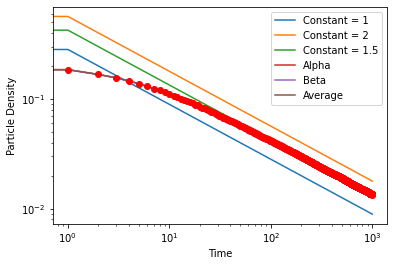

In [1]:
# This is a sample Python script.

# Press Shift+F10 to execute it or replace it with your code.
# Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.
import random
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt2
import math
import statistics
import numpy
import sys

class Particle:
    def __init__(self, position, pair, pairValue):
        self.position = position
        self.pair = pair
        self.pairValue = pairValue

    def getPosition(self):
        return self.position

    def getPair(self):
        return self.pair

    def getPairValue(self):
        return self.pairValue

    def setPosition(self,pos):
        self.position = pos

    def setPair(self,p):
        self.pair = p

    def setPairValue(self,p):
        self.pairValue = p


def boardPrint(board):
    print("[", end = '')
    for i in range(0,len(board)):
        if board[i] != 0:
            print("1", end = '')
        else:
            print("0", end='')
        if i != len(board) -1:
            print(",", end = '')
    print("]", end = '')


def timeStep(board, particleList):
    numParticles = len(particleList)
    if len(particleList) > 0: 
        for i in range(0, numParticles):
            x = random.randint(0, len(particleList) - 1)
            p = particleList[x]
            sign = 1
            if random.random() < 0.5:
                sign = -1
            while ((p.getPosition() == 0 and sign == -1) or (p.getPosition() == len(board) - 1 and sign == 1)):
                x = random.randint(0, len(particleList) - 1)
                p = particleList[x]
                sign = 1
                if random.random() < 0.5:
                    sign = -1
            if board[p.getPosition() + sign] == 0:
                board[p.getPosition() + sign] = board[p.getPosition()]
                board[p.getPosition()] = 0
                p.setPosition(p.getPosition() + sign)
            else:
                if p.getPair() == board[p.getPosition() + sign]:
                    if p.getPairValue() == 0:
                        particleList.remove(p)
                        particleList.remove(board[p.getPosition() + sign])
                        board[p.getPosition()] = 0
                        board[p.getPosition() + sign] = 0
                        # if p.getPairValue() == 1 then do nothing since they are already paired
                else:
                    s = p.getPair() 
                    q = board[p.getPosition() + sign]

                    r = q.getPair()
                    n = p.getPairValue()
                    nPrime = q.getPairValue()
                    m = 0
                    if random.random() < 0.5:
                        m = 1
                    mPrime = 0
                    if ((n + nPrime) % 2 != (m + mPrime) % 2):
                        mPrime = 1

                    p.setPair(q)
                    q.setPair(p)
                    p.setPairValue(m)
                    q.setPairValue(p.getPairValue())

                    s.setPair(r)
                    r.setPair(s)
                    s.setPairValue(mPrime)
                    r.setPairValue(s.getPairValue())
                    if m == 0:
                        particleList.remove(p)
                        particleList.remove(q)
                        board[p.getPosition()] = 0
                        board[q.getPosition()] = 0
    return numParticles/len(board)



totalAlpha = []
totalBeta = []
for k in range(0,100):
    print(k+1)
    numPAlpha = []
    numPBeta = []
    boardAlpha = []
    boardBeta = []
    boardSize = 1000
    N0 = 200
    particleListAlpha = []
    particleListBeta = []

    for i in range(0,boardSize):
        boardAlpha.append(0)
        boardBeta.append(0)
    occupiedAlpha = []
    occupiedBeta = []
    for i in range(0,N0):
        x = random.randint(0,len(boardAlpha)-1)
        while x in occupiedAlpha:
            x = random.randint(0,len(boardAlpha)-1)
        occupiedAlpha.append(x)
        p = Particle(x,None, 1)
        boardAlpha[x] = p
        particleListAlpha.append(p)

        y = random.randint(0,len(boardBeta)-1)
        while y in occupiedBeta:
            y = random.randint(0,len(boardBeta)-1)
        occupiedBeta.append(y)
        p = Particle(y, None, 1)
        boardBeta[y] = p
        particleListBeta.append(p)


    v = False
    a = 0
    b = 0
    for i in range(0,len(boardAlpha)):
        if boardAlpha[i] != 0:
            if v == False:
                a = i
                v = True
            else:
                b = i
                v = False
                boardAlpha[a].setPair(boardAlpha[b])
                boardAlpha[b].setPair(boardAlpha[a])
                a = 0
                b = 0

    v = False
    a = 0
    b = 0
    for i in range(0,len(boardBeta)):
        if boardBeta[i] != 0:
            if v == False:
                a = i
                v = True
            else:
                b = i
                v = False
                boardBeta[a].setPair(boardBeta[b])
                boardBeta[b].setPair(boardBeta[a])
                a = 0
                b = 0

    for j in range(0,1000):
        numPAlpha.append(timeStep(boardAlpha, particleListAlpha))
        numPBeta.append(timeStep(boardBeta, particleListBeta))
        # Do the braiding code here
        for i in range(0,len(boardAlpha)):
            if boardAlpha[i] != 0 and boardBeta[i] != 0:
                p = boardAlpha[i]
                q = p.getPair()
                a = boardBeta[i]
                b = a.getPair()


                if p.getPairValue() == 1:
                    p.setPairValue(0)
                    q.setPairValue(0)
                else:
                    p.setPairValue(1)
                    q.setPairValue(1)

                if a.getPairValue() == 1:
                    a.setPairValue(0)
                    b.setPairValue(0)
                else:
                    a.setPairValue(1)
                    b.setPairValue(1)
    totalAlpha.append(numPAlpha)
    totalBeta.append(numPBeta)

averageAlpha = []
averageBeta = []

totalStd = []
for i in range(0,len(totalAlpha[0])):
    sumAlpha = 0
    sumBeta = 0
    temp = []
    for j in range(0,len(totalAlpha)):
        sumAlpha = sumAlpha + totalAlpha[j][i]
        sumBeta = sumBeta + totalBeta[j][i]
        temp.append(totalAlpha[j][i])
        temp.append(totalBeta[j][i])
        # temp.append(totalAlpha[j][i])
    averageAlpha.append(sumAlpha/len(totalAlpha))
    averageBeta.append(sumBeta/len(totalBeta))
    totalStd.append(1*(statistics.stdev(temp)/math.sqrt(200)))

time = []
for i in range(0,len(numPAlpha)):
    time.append(i)

average = []
for i in range(0,len(averageAlpha)):
    average.append((averageAlpha[i] + averageBeta[i])/2)

y2 = []
y = []
y15 = []
y2.append(2/(math.sqrt(4*(math.pi)*1)))
y.append(1/(math.sqrt(4*(math.pi)*1)))
y15.append(1.5/(math.sqrt(4*(math.pi)*1)))
for i in range(1,len(time)):
    y2.append(2/(math.sqrt(4*(math.pi)*time[i])))
    y.append(1/(math.sqrt(4*(math.pi)*time[i])))
    y15.append(1.5/(math.sqrt(4*(math.pi)*time[i])))



plt.yscale("log")
plt.xscale("log")
plt.plot(time, y)
plt.plot(time, y2)
plt.plot(time, y15)
plt.plot(time,averageAlpha)
plt.plot(time, averageBeta)
plt.plot(time, average)
plt.legend(["Constant = 1", "Constant = 2", "Constant = 1.5" ,"Alpha", "Beta", "Average"], loc = "upper right")
plt.xlabel('Time')
plt.ylabel('Particle Density')
plt.errorbar(time, average, yerr = totalStd, fmt = "o",color="r")
plt.show()